## Análise de dados de vendas de Imóveis

### Carregando *packages*

In [107]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mpc
import seaborn as sns

### Carregando base de dados

In [108]:
df = pd.read_csv("dados_imoveis.csv")
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


### Explorando a base de dados

In [109]:
#Drop valores duplicados
print(df.shape)
df.drop_duplicates(inplace = True)
print(df.shape)

(10008, 8)
(9453, 8)


In [110]:
#Data types de cada variável
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9453 entries, 0 to 9971
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6207 non-null   object
 1   Bairro     9443 non-null   object
 2   Cidade     9453 non-null   object
 3   Metragem   9453 non-null   int64 
 4   Quartos    9453 non-null   int64 
 5   Banheiros  9453 non-null   int64 
 6   Vagas      9453 non-null   int64 
 7   Valor      9453 non-null   object
dtypes: int64(4), object(4)
memory usage: 664.7+ KB


In [111]:
#Número de valores únicos de cada variável
df.nunique()

Rua          3130
Bairro        701
Cidade          1
Metragem      916
Quartos        15
Banheiros      15
Vagas          28
Valor        1041
dtype: int64

### Tratamento de missings-Bairros sem nome de Rua

In [112]:
#Verificando missings
df.isna().sum()

Rua          3246
Bairro         10
Cidade          0
Metragem        0
Quartos         0
Banheiros       0
Vagas           0
Valor           0
dtype: int64

In [113]:
#Explorando nome dos Bairros
df['Bairro'].unique()

array(['Planalto Paulista', 'Jardim dos Estados', 'Jardim Reimberg',
       'Jardim Morumbi', 'Mooca', 'Santo Amaro', 'Cidade Mãe do Céu',
       'Jardim Vergueiro', 'Jardim Benfica', 'Vila Alpina',
       'Vila Monumento', 'Jardim Luzitânia', 'Vila Uberabinha',
       'Jardim Prudência', 'Lauzane Paulista', 'Jardim Santa Maria',
       'Vila Nova', 'Itaberaba', 'Vila Nova Conceição', 'Jardim da Saúde',
       'Jardim Santo Antônio', 'Vila Mazzei', 'Vila Madalena',
       'Jardim Ivana', 'Vila Campo Grande', 'Vila Gomes Cardim',
       'Bela Aliança', 'Vila Albertina', 'Cidade Jardim',
       'Parque da Lapa', 'Vila Libanesa', 'Cidade Domitila',
       'Vila Nova Savoia', 'Jardim Maria Estela', 'Parque São Rafael',
       'Vila Bandeirantes', 'Parque Colonial', 'Vila Califórnia',
       'Jardim das Imbuias', 'Vila Tramontano', 'Vila Nancy',
       'Parada Inglesa', 'Jardim Leonor Mendes de Barros', 'Jardim Iva',
       'Jardim Amália', 'Vila dos Remédios', 'Brooklin Paulista',
       '

Aguns nomes de bairros aparecem como valores únicos, pois possuem suas zona especificadas, vamos remover as zonas desses bairros

In [114]:
df['Bairro'] = df['Bairro'].str.split('(', 0, expand = True)
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [115]:
#Número de Bairros únicos
df['Bairro'].nunique()

693

In [116]:
#Número de Bairros que não possuem nome de ruas
df.loc[df.Rua.isna(), 'Bairro'].nunique()

393

In [117]:
#Preenchendo missing da variável 'Rua'
df = df.fillna({'Rua': 'Rua Sem denominação'})
df.isna().sum()

Rua           0
Bairro       10
Cidade        0
Metragem      0
Quartos       0
Banheiros     0
Vagas         0
Valor         0
dtype: int64

### Tratando missing-Descobrindo as rua sem nome de bairros

In [118]:
#Separando nome da rua do número
df[['Logradouro', 'Numero']] = df['Rua'].str.split(',', 1, expand = True)
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Logradouro,Numero
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,Avenida Itacira,255
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,Rua Aurelia Perez Alvarez,42
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,Rua Alba Valdez,None
3,Rua Sem denominação,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,Rua Sem denominação,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,Rua Tobias Barreto,195


In [119]:
rua_sem_bairro = list(df.loc[df['Bairro'].isna(), 'Logradouro'])
rua_sem_bairro

['Rua Madalena de Morais',
 'Rua Vergueiro',
 'Rua Alvorada do Sul',
 'Rua Professor Eduardo Monteiro',
 'Avenida Comendador Adibo Ares',
 'Rua Alvorada do Sul',
 'Rua Professor Eduardo Monteiro',
 'Rua Santo Eufredo',
 'Rua Professor Lúcio Martins Rodrigues',
 'Rua Pacobá']

In [120]:
#Descobrindo o nome do bairro correspondente a rua
bairro_correspondente = []
for rua in rua_sem_bairro:
    bairro = df.loc[df['Rua'] == rua, 'Bairro'].unique()
    if len(bairro) > 0:
        bairro_correspondente.append([rua, bairro[0]])
    else:
        bairro_correspondente.append([rua, 'Sem denominação'])
#Verificando
bairro_correspondente

[['Rua Madalena de Morais', 'Jardim Leonor'],
 ['Rua Vergueiro', 'Vila Firmiano Pinto'],
 ['Rua Alvorada do Sul', 'Jardim Guedala'],
 ['Rua Professor Eduardo Monteiro', 'Jardim Leonor'],
 ['Avenida Comendador Adibo Ares', 'Morumbi'],
 ['Rua Alvorada do Sul', 'Jardim Guedala'],
 ['Rua Professor Eduardo Monteiro', 'Jardim Leonor'],
 ['Rua Santo Eufredo', 'Jardim Guedala'],
 ['Rua Professor Lúcio Martins Rodrigues', 'Sem denominação'],
 ['Rua Pacobá', 'Jardim Panorama']]

In [121]:
#Fill missings
for bairro in bairro_correspondente[1]:
    df.loc[df['Bairro'].isna(), 'Bairro'] = bairro
df.isna().sum()

Rua              0
Bairro           0
Cidade           0
Metragem         0
Quartos          0
Banheiros        0
Vagas            0
Valor            0
Logradouro       0
Numero        8174
dtype: int64

### Bairros com maior número de anúncios

#### Definindo função de plotagem

In [122]:
def barhplot(y:str, data: pd.DataFrame, palette: str, title: str, figsize = (8, 10)):
    #Criando gradiente de cores para as barras
    cmap = plt.cm.get_cmap(palette)
    bar_colors = [mpc.to_hex(cmap(k)) for k in np.linspace(1, 0.4, len(data))]
    #Plot do gráfico de barras
    plt.figure(figsize = figsize)
    g = plt.barh(data.index, data[y], color = bar_colors)
    plt.gca().invert_yaxis()
    #Adicionando rótulos para os dados
    for bar in g.patches:
        value = bar.get_width()
        plt.text(s = f'{value}',
                 x = bar.get_x() + bar.get_width(),
                 y = bar.get_y() + bar.get_height()/2 ,
                 ha = 'right',
                 va = 'center',
                 fontweight = 'bold',
                 color = 'white')
    #Titulo
    plt.gca().set_title(f'{title}', fontweight = 'bold');
    #Removendo eixos
    for spine in ['top', 'bottom', 'left', 'right']:
        plt.gca().spines[spine].set_visible(False)
    #Removendo xticks
    plt.tick_params(axis = 'x', bottom = False, labelbottom = False)

#### Agrupando dados

In [123]:
top15_anuncios = (df
                 .groupby('Bairro')
                 .agg({'Bairro': 'count'})
                 .rename(columns = {'Bairro': 'Nº de anúncios'})
                 .sort_values(by = 'Nº de anúncios', ascending = False)
                 .head(15)
                )
top15_anuncios

,Nº de anúncios
Bairro,
Alto de Pinheiros,391
Jardim Guedala,378
Jardim Paulista,294
Cidade Jardim,225
Brooklin Paulista,224
Jardim Europa,221
Pacaembu,211
Vila Madalena,210
Planalto Paulista,187


#### Plotando ranking

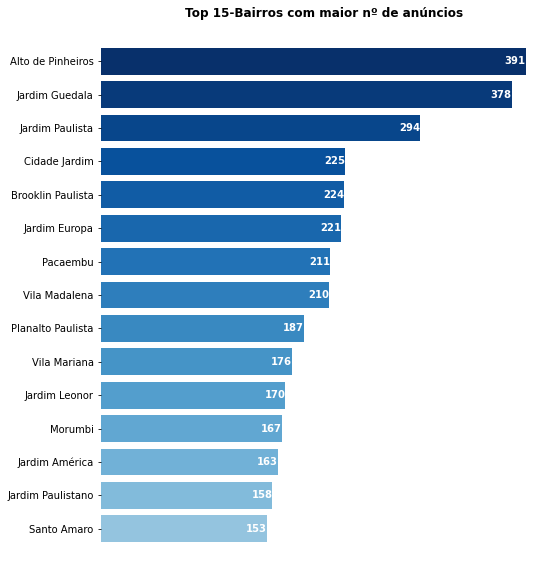

In [124]:
barhplot(y = 'Nº de anúncios', data = top15_anuncios, palette = 'Blues', title = 'Top 15-Bairros com maior nº de anúncios')

### Bairros com maior metragem média

#### Agrupando dados

In [126]:
top15_metragem = (df
                 .groupby('Bairro')
                 .agg({'Metragem':'mean'})
                 .round(2)
                 .rename(columns = {'Metragem': 'Metragem média'})
                 .sort_values(by = 'Metragem média', ascending = False)
                 .head(15)
                )
top15_metragem

,Metragem média
Bairro,
Sítio Represa,37000.00
Vila Castelo,2850.00
Jardim Guedala,2610.01
Jardim das Camélias,1700.00
Chácara Flora,1260.73
Jardim Sílvia,1172.79
Vila Aurora,1082.50
Retiro Morumbi,1060.68
Paineiras do Morumbi,757.27


#### Plotando ranking

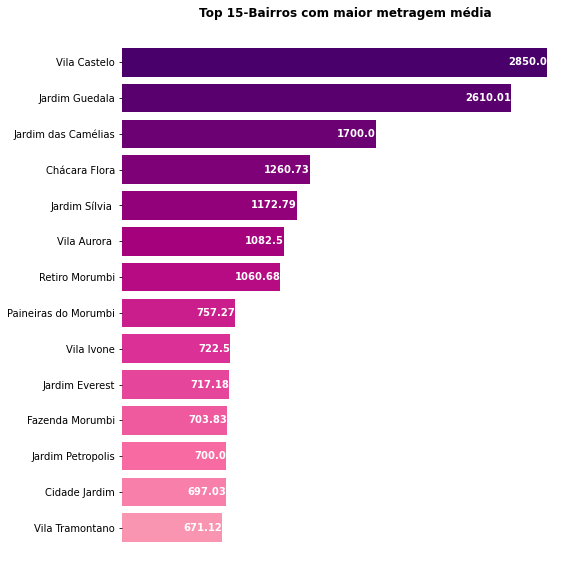

In [127]:
#Devido ao alto ´metragem para Sitio Represa, vamos desconsiderá-lo no plot
barhplot(y = 'Metragem média', data = top15_metragem[1:], palette = 'RdPu', title = 'Top 15-Bairros com maior metragem média')

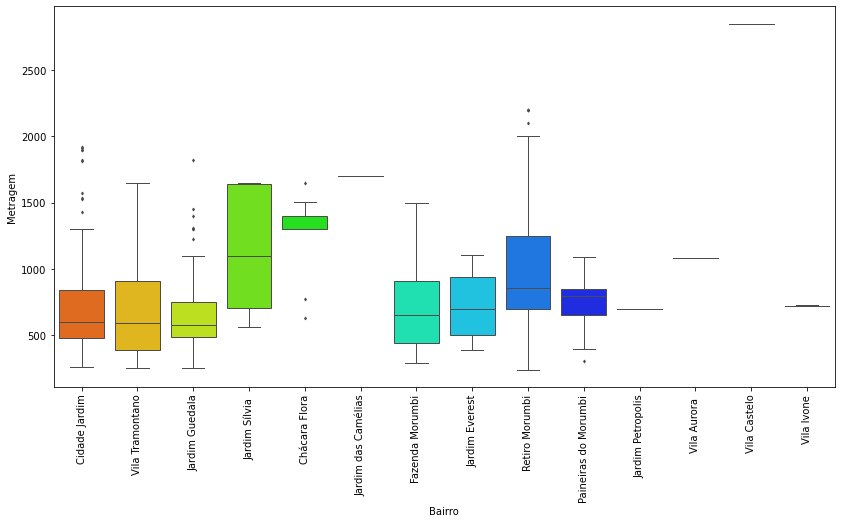

In [128]:
plt.figure(figsize = (14, 7))
ax = sns.boxplot(x = 'Bairro',
                 y = 'Metragem',
                 data = df.query("Metragem <= 3000 and Bairro in @top15_metragem.index"),
                 palette = 'hsv',
                 linewidth = 1,
                 fliersize = 2)
ax.tick_params(axis = 'x', rotation = 90)

### Bairros com valor de anúncio mais caros 

#### Determinando valor de anúncio 

In [129]:
df[['Moeda', 'Valor']] = df['Valor'].str.split(' ', 1, expand = True)
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Logradouro,Numero,Moeda
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000.000,Avenida Itacira,255,R$
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.700.000,Rua Aurelia Perez Alvarez,42,R$
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380.000,Rua Alba Valdez,None,R$
3,Rua Sem denominação,Jardim Morumbi,São Paulo,310,3,2,4,685.000,Rua Sem denominação,None,R$
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540.000,Rua Tobias Barreto,195,R$


In [130]:
df['Valor'].dtypes

dtype('O')

In [131]:
#Convertendo valor de anúncio para formato adequado
df['Valor'] = df['Valor'].str.replace('.', '')
df['Valor'] = pd.to_numeric(df['Valor'], errors = 'coerce')
df['Valor'] 

<ipython-input-131-2681513bcf82>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Valor'] = df['Valor'].str.replace('.', '')


0       7000000.0
1       3700000.0
2        380000.0
3        685000.0
4        540000.0
          ...    
9967     665000.0
9968    2300000.0
9969    1050000.0
9970          NaN
9971     270000.0
Name: Valor, Length: 9453, dtype: float64

In [132]:
bairros_mais_caros = (df[['Bairro', 'Valor']]
                     .groupby('Bairro')
                     .agg('mean')
                     .round(2)
                     .sort_values(by = 'Valor', ascending = False)
                     .head(10)
                     )
bairros_mais_caros

,Valor
Bairro,
Jardim América,16309431.03
Jardim Teresa,14836666.67
Chácara Flora,13500000.00
Retiro Morumbi,11884545.45
Jardim Europa,11591912.31
Jardim Luzitânia,8369096.39
Jardins,8157142.86
Morro dos Ingleses,8100000.00
Jardim Paulista,8079545.10


#### Plotando ranking

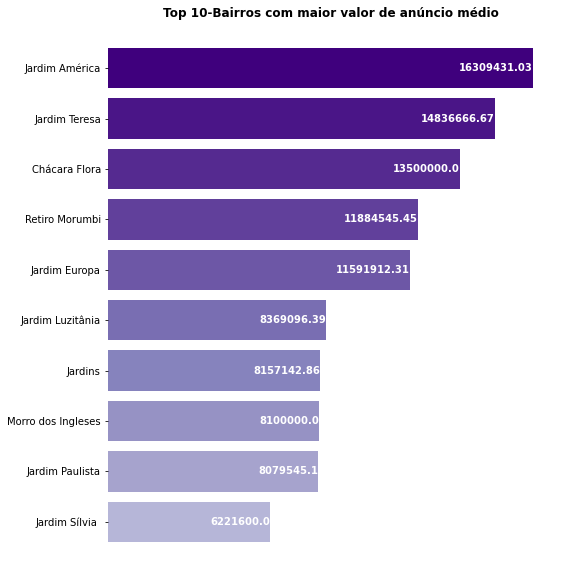

In [133]:
barhplot(y = 'Valor', data = bairros_mais_caros, palette = 'Purples', title = 'Top 10-Bairros com maior valor de anúncio médio')

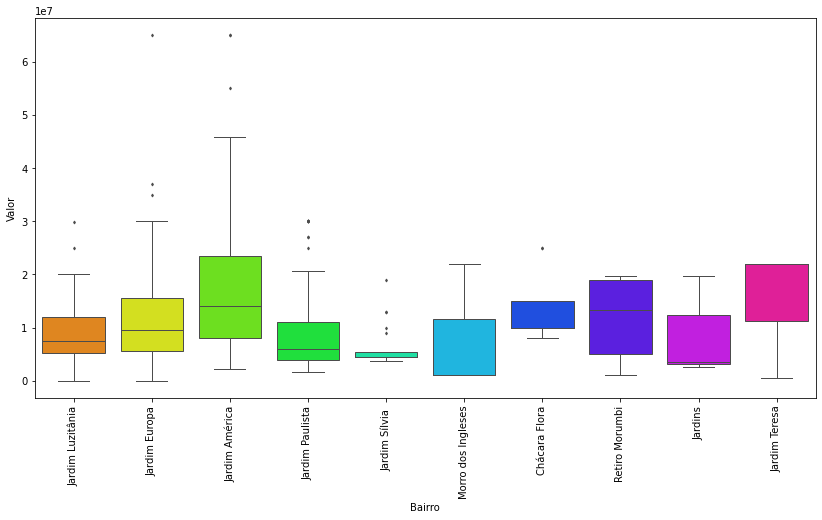

In [134]:
plt.figure(figsize = (14, 7))
ax = sns.boxplot(x = 'Bairro',
                 y = 'Valor',
                 data = df.query("Bairro in @bairros_mais_caros.index"),
                 palette = 'hsv',
                 linewidth = 1,
                 fliersize = 2)
ax.tick_params(axis = 'x', rotation = 90)

### Bairros com valor de metro quadrado mais caros 

In [135]:
#Cálculo do valor do metro quadrado
df['Valor_m2'] = df['Valor'].div(df['Metragem'], axis = 0)
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Logradouro,Numero,Moeda,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.0,Avenida Itacira,255,R$,7000.000000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.0,Rua Aurelia Perez Alvarez,42,R$,7459.677419
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.0,Rua Alba Valdez,None,R$,3040.000000
3,Rua Sem denominação,Jardim Morumbi,São Paulo,310,3,2,4,685000.0,Rua Sem denominação,None,R$,2209.677419
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.0,Rua Tobias Barreto,195,R$,5400.000000


In [136]:
m2_mais_caro = (df[['Bairro', 'Valor_m2']]
                .groupby('Bairro')
                .agg('mean')
                .round(2)
                .sort_values(by = 'Valor_m2', ascending = False)
                .head(10)
                )
m2_mais_caro

,Valor_m2
Bairro,
Vila Guaca,80000.00
Jardim América,24018.51
Jardim Europa,20104.49
Jardim Ampliação,17661.25
Jardim Teresa,17465.56
Vila Nova Conceição,17401.06
Jardim Luzitânia,16531.57
Jardim Paulista,16048.78
Jardim Paulistano,14897.62


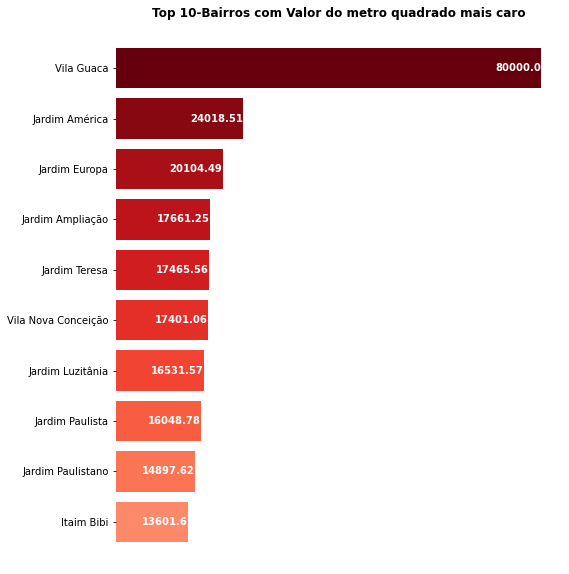

In [137]:
barhplot(y = 'Valor_m2', data = m2_mais_caro, palette = 'Reds', title = 'Top 10-Bairros com Valor do metro quadrado mais caro')

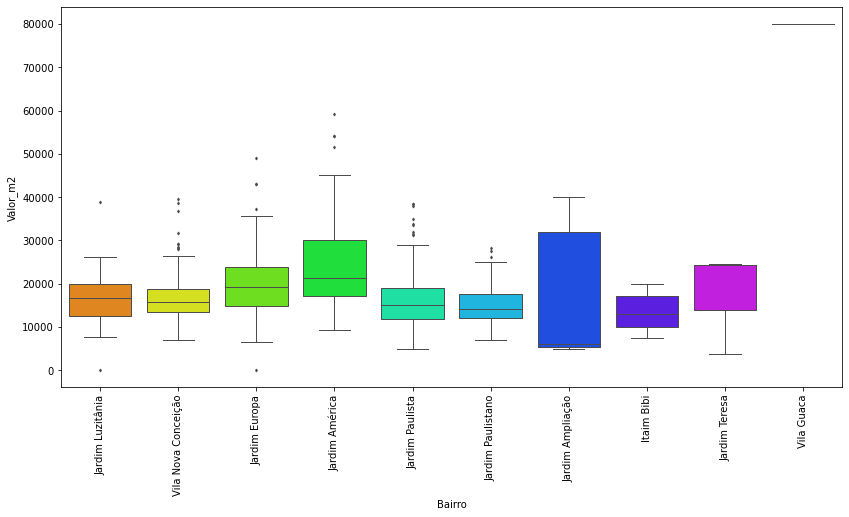

In [138]:
plt.figure(figsize = (14, 7))
ax = sns.boxplot(x = 'Bairro',
                 y = 'Valor_m2',
                 data = df.query("Bairro in @m2_mais_caro.index"),
                 palette = 'hsv',
                 linewidth = 1,
                 fliersize = 2)
ax.tick_params(axis = 'x', rotation = 90)

### Histograma dos valores de anúncios

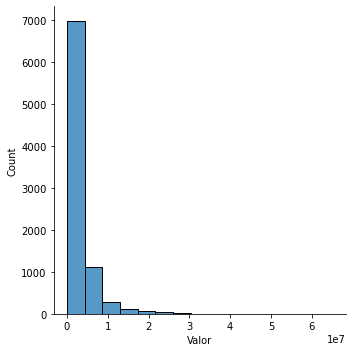

In [139]:
sns.displot(data = df, x = 'Valor', bins = 15)

In [140]:
valores = [2e7, 1e7, .75e7]
for valor in valores:
    percentual = np.mean(df.Valor <= valor)
    print(f'Percentual de valores menores que R${valor:.2f}: {percentual:.4f}')

Percentual de valores menores que R$20000000.00: 0.9057
Percentual de valores menores que R$10000000.00: 0.8706
Percentual de valores menores que R$7500000.00: 0.8392


<Figure size 720x1080 with 0 Axes>

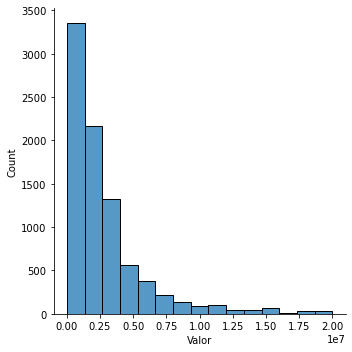

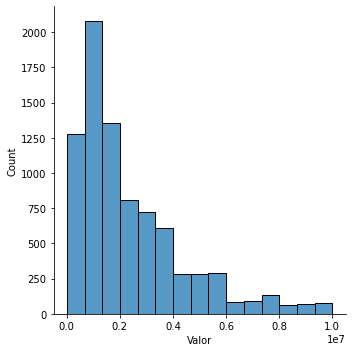

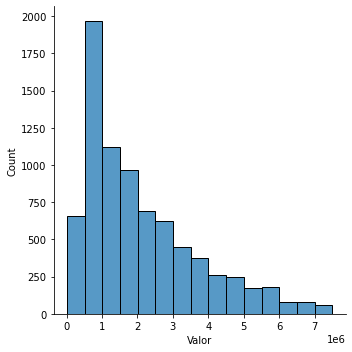

In [141]:
plt.figure(figsize = (10, 15))
valores = [2e7, 1e7, .75e7]
for valor in valores:
    sns.displot(data = df.query(f"Valor <= {valor}"), x = 'Valor', bins = 15)

### Relação dos valores de anúncio e as demais variáveis

In [142]:
df.quantile([.9, .95, .99], axis = 0)

,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_m2
0.90,700.0,5.0,6.0,7.0,6500000.0,14438.502674
0.95,865.0,5.0,7.0,9.0,10000000.0,18375.241779
0.99,1300.0,7.0,9.0,14.0,19920000.0,28301.886792


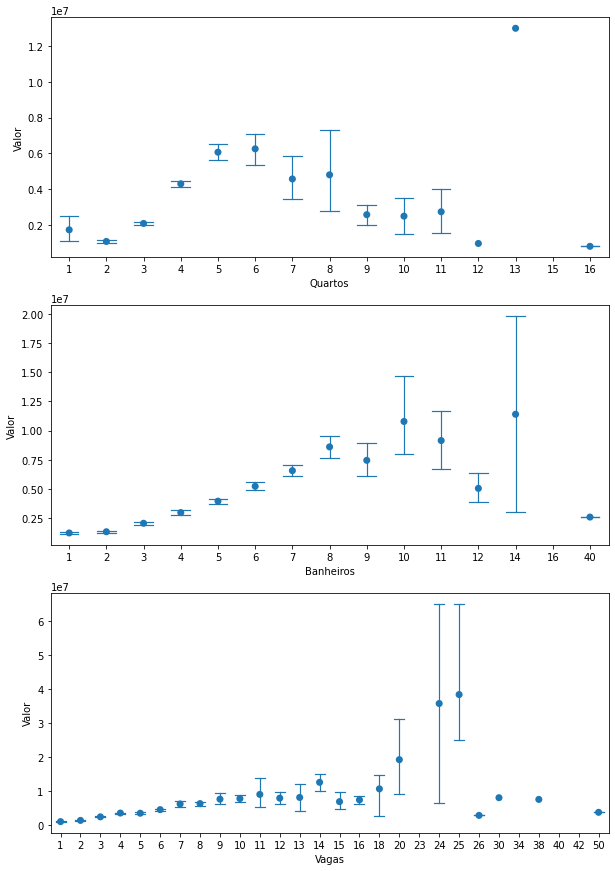

In [143]:
fig, axs = plt.subplots(3, 1, figsize = (10, 15))
cols = ['Quartos', 'Banheiros', 'Vagas']
for ax, col in zip(axs, cols):
    sns.pointplot(ax = ax,
                  x = col,
                  y = 'Valor',
                  data = df,
                  scale = 0.8,
                  errwidth = 1.2,
                  capsize = 0.5,
                  join = False)

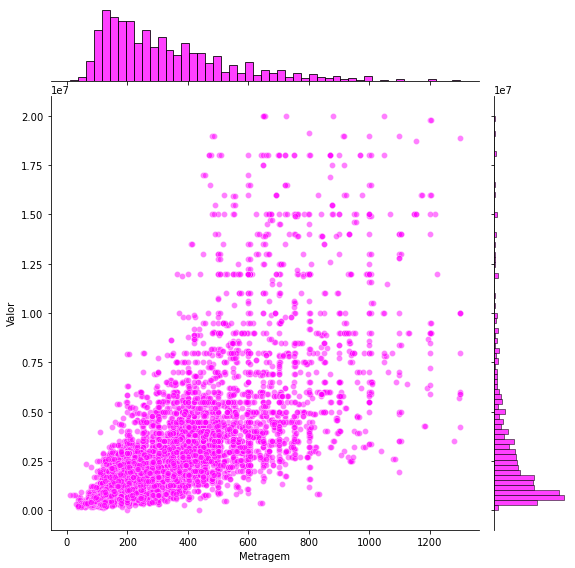

In [144]:
g = sns.JointGrid(x = 'Metragem', y = 'Valor', data = df.query('Metragem <= 1300 and Valor <= 2e7'), height = 8)
g.plot_joint(sns.scatterplot, color = '#FF00FF', alpha = 0.5)
g.plot_marginals(sns.histplot, color = '#FF00FF')